In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
w1 = np.array([[2,6],[3,4],[3,8],[4,6]])
w2 = np.array([[3,0],[1,-2],[3,-4],[5,-2]])

In [18]:
def covariance(X):
    mean = np.mean(X,axis=0)
    X = X - mean
    return (X.T @ X)/(X.shape[0]-1)

In [19]:
def find_case(w1, w2):
    cov_w1, cov_w2 = covariance(w1), covariance(w2)
    if (cov_w1 == cov_w2).all():
        identity = np.identity(w1.shape[1])
        if ((cov_w1[0, 0] * identity) == cov_w1).all():
            return 1
        else:
            return 2
    else:
        return 3

In [20]:
def g_of_x(X, apriori,case):
    cov = covariance(X)
    inv_cov = np.linalg.inv(cov)
    mean = np.mean(X,axis=0)
    cov_det = np.linalg.det(cov)

    if case == 1:
        sigma_sq = cov[0, 0]
        A = np.zeros_like(inv_cov)
        B = mean.T / sigma_sq
        C = -0.5 * mean.T.dot(mean) / sigma_sq + np.log(apriori)
    elif case == 2:
        A = np.zeros_like(inv_cov)
        B = inv_cov.dot(mean)
        C = -0.5 * mean.T.dot(inv_cov).dot(mean) + np.log(apriori)
    elif case == 3:
        A = -0.5 * inv_cov
        B = inv_cov.dot(mean)
        C = -0.5 * mean.T.dot(inv_cov).dot(mean) - 0.5 * np.log(cov_det) + np.log(apriori)
    return lambda x: x.T @ A @ x + B.T @ x + C  

In [21]:
def discriminant_plot(g1, g2):
    x = np.linspace(-20,20,100)
    y = np.linspace(-20,20,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([0, 6, -6, 10])

In [22]:
case = find_case(w1,w2)
g1 = g_of_x(w1,0.5,case)
g2 = g_of_x(w2,0.5,case)

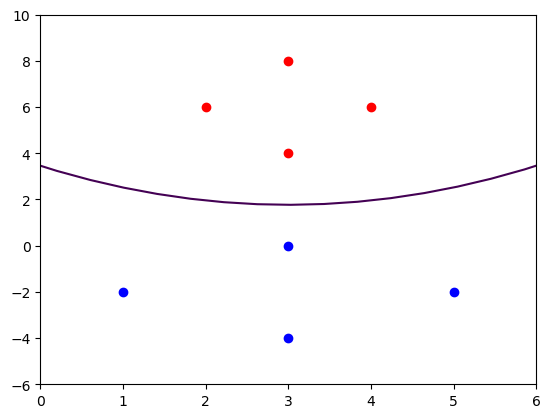

In [23]:
discriminant_plot(g1,g2)
plt.scatter(w1[:,0],w1[:,1],color='red')
plt.scatter(w2[:,0],w2[:,1],color='blue')
plt.show()